In [1]:
import pymesh
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.stats as stats
import math

In [2]:
'''Functions'''
def rotate_origin_only(x, y, radians):
    """Only rotate a point around the origin (0, 0)."""
    xx = x * math.cos(radians) + y * math.sin(radians)
    yy = -x * math.sin(radians) + y * math.cos(radians)

    return xx, yy

In [3]:
tree1 = pymesh.generate_cylinder((0, 0, 0), (0, 0, 3), 1.5, 0.25, 32)
tree2 = pymesh.generate_cylinder((0.5, 1, 0), (0.5, 1, 2), 1, 0.25, 32)
tree3 = pymesh.generate_cylinder((1.5, 3, 0), (1.5, 3, 4), 2.5, 0.25, 32)

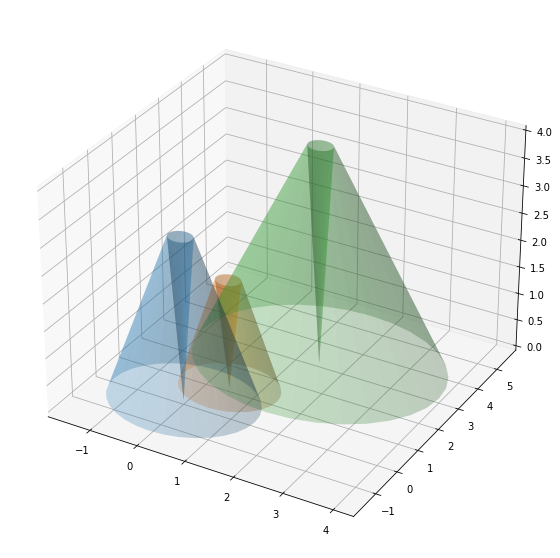

In [4]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

for tree in [tree1, tree2, tree3]:
    l = len(tree.vertices)
    x = [tree.vertices[i][0] for i in range(0, l)]
    y = [tree.vertices[i][1] for i in range(0, l)]
    z = [tree.vertices[i][2] for i in range(0, l)]
    ax.plot_trisurf(x,y,z, alpha = 0.25)

In [5]:
'''Compute Union of Trees'''
uni = pymesh.boolean(pymesh.boolean(tree1, tree2, 'union'), tree3, 'union')

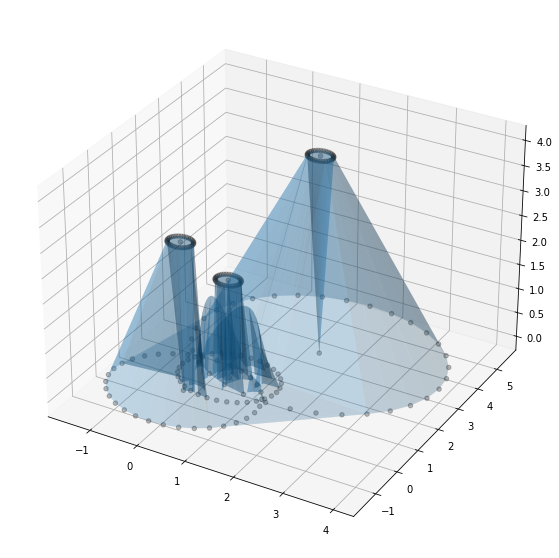

In [6]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

for tree in [tree1, tree2, tree3]:
    l = len(tree.vertices)
    x = [tree.vertices[i][0] for i in range(0, l)]
    y = [tree.vertices[i][1] for i in range(0, l)]
    z = [tree.vertices[i][2] for i in range(0, l)]
    ax.scatter(x,y,z, color = 'black', alpha = 0.25)

l = len(uni.vertices)
x_uni = [uni.vertices[i][0] for i in range(0, l)]
y_uni = [uni.vertices[i][1] for i in range(0, l)]
z_uni = [uni.vertices[i][2] for i in range(0, l)]
ax.plot_trisurf(x_uni, y_uni, z_uni, alpha = 0.25)

In [7]:
'''Compute Intersection of Trees'''
intersects = []
for t in [tree1, tree2, tree3]:
    for t2 in [tree1, tree2, tree3]:
        if t == t2:
            next
        else:
            i = pymesh.boolean(t, t2, 'intersection')
            intersects.append(i)
     
    
u = intersects[0]
for i in (1, len(intersects) - 1):
    u = pymesh.boolean(u, intersects[i], 'union')
            

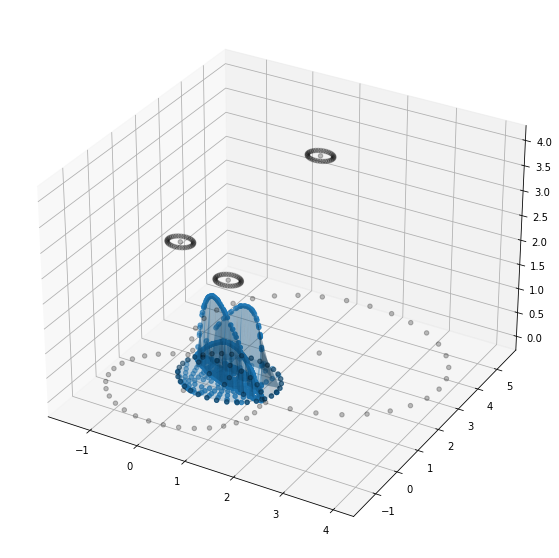

In [8]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

for tree in [tree1, tree2, tree3]:
    l = len(tree.vertices)
    x = [tree.vertices[i][0] for i in range(0, l)]
    y = [tree.vertices[i][1] for i in range(0, l)]
    z = [tree.vertices[i][2] for i in range(0, l)]
    ax.scatter(x,y,z, color = 'black', alpha = 0.25)
    
l = len(u.vertices)
x_int = [u.vertices[i][0] for i in range(0, l)]
y_int = [u.vertices[i][1] for i in range(0, l)]
z_int = [u.vertices[i][2] for i in range(0, l)]
ax.scatter(x_int, y_int, z_int)
ax.plot_trisurf(x_int, y_int, z_int, alpha = 0.25)

In [ ]:
#Hopkins Index
ELEVATION = 422 #meters
LATITUDE = 47.5152344351
LONGITUDE = -93.4706821209
HI = (ELEVATION - 887) / 100) * 1.0 + (LATITUDE – 39.54) * 4.0 + (-82.52-
LONGITUDE) * 1.25 

In [ ]:
dCR = 10 * (b1 / (1 + b2 * BA) + (b3 * (1 – exp(b4 * DBH)))) 
cCR = 10 * (b1 / (1 + b2 * BA) + (b3 * (1 – exp(b4 * DBH)))) 

In [12]:
'''Combine into function'''

def simulateSite3D(n, distMu, distSigma, dbhMu, dbhSigma, pCon, plots = False):
    #Step 1: Generate site
    site = pymesh.generate_cylinder((0, 0, 0), (0, 0, 25), 8, 8, 32)

    #Generate distances
    dists = np.random.normal(loc = distMu, scale = distSigma, size = n)

    #Check all are in correct range
    while ((dists > 8).any()) | ((dists < 0).any()):
        dists = np.random.normal(loc = distMu, scale = distSigma, size = n)

    #Generate DBHs (in cm)
    dbhs = np.random.normal(loc = dbhMu, scale = dbhSigma, size = n)

    #Check all are in correct range
    while(dbhs < 0).any():
        dbhs = np.random.normal(loc = dbhMu, scale = dbhSigma, size = n)

    #Generate heights
    #Deciduous - Red Maple
    dhts = 4.5 + math.exp(4.3379 - 3.8214/(dbhs + 1.0)) 
    #Coniferous - Black Spruce
    cths =  4.5 + 2163.9468*math.exp(-6.2688*math.pow(dbhs, -0.2161)) 

    #Based on pCon, assign crown width for conif and decid trees
    nCon = int(n*pCon)
    crown = np.zeros(n)
    height = np.zeros(n)
    #take first nCon trees:
    if nCon == n:
        #For sites with all conifers, just take all simulated crown data
        crown = -0.8566 + (0.9693 * dbhs) + (0.0573 * CR) 
        height = chts
    elif (nCon > 0) & (nCon < n):
        #CONIFEROUS 
        crown[0:nCon+1] = -0.8566 + (0.9693 * dbhs[0:nCon+1]) + (0.0573 * CR) 
        height[0:nCon+1] = chts[0:nCon+1]
        #DECIDUOUS 
        crown[nCon+1:] = 2.7563 + (1.4212 * dbhs[nCon+1:]) + (-0.0143 * math.pow(dbhs[nCon+1:],2)) + (0.0993 * CR) + (-0.0276 * HI)  
        height[nCon+1:] = dhts[nCon+1:]
    else:
        #try just using DBH instead of overestimated canopy 
        crown = crown[nCon+1:] = 2.7563 + (1.4212 * dbhs) + (-0.0143 * math.pow(dbhs, 2)) + (0.0993 * CR) + (-0.0276 * HI)  
        height = dhts

    #Generate locations
    trees = []
    for i in range(0, len(dists)):
        #assume on x axis and rotate a random number of degrees
        deg = np.random.uniform(low = 0, high = 2*math.pi)
        xx, yy = rotate_origin_only(dists[i], 0, deg)

        #create point
        trees.append(pymesh.generate_cylinder((xx, yy, 0), (xx, yy, height[i]), crown[i], 0, 32)) #generally set height to 18, adjust once Salli sends allometric equations


    #Step 1.5: Calculate total tree canopy
    volumes = [tree.volume for tree in trees]
    tot = np.cumsum(volumes)[-1]

    #Step 2: Calculate total plot coverage
    #Use shapely to calculate the total union and the intersection over the union
    uni = trees[0]
    for tree in trees[1:]:
        uni = pymesh.boolean(uni, tree, 'union')
    
    uni_clipped = pymesh.boolean(uni, site, 'intersection')
    pcoverage = float(uni_clipped.volume/site.volume)

    #Step 3: Calculate total overlap
    #Collect intersections recursively
    intersects = []
    for i in range(len(trees)):
        for j in range(i):
            intersects.append(pymesh.boolean(trees[i], trees[j], 'intersection'))

    #merge
    ints = intersects[0]
    for i in range(1, len(intersects)):
        ints = pymesh.boolean(ints, intersects[i], 'union')
        
    print(len(intersects))
    
    #Clip
    int_clipped = pymesh.boolean(ints, site, 'intersection')
    poverlap = float(int_clipped.volume/site.volume)

    #Step 4: Plot
    if(plots):
        fig = plt.figure(figsize = (12,10))
        ax = plt.axes(projection='3d')

        #plot trees
        for tree in trees:
            l = len(tree.vertices)
            x = [tree.vertices[i][0] for i in range(0, l)]
            y = [tree.vertices[i][1] for i in range(0, l)]
            z = [tree.vertices[i][2] for i in range(0, l)]
            ax.scatter(x,y,z, color = 'black', alpha = 0.25)

        #plot intersection
        l = len(ints.vertices)
        x_int = [ints.vertices[i][0] for i in range(0, l)]
        y_int = [ints.vertices[i][1] for i in range(0, l)]
        z_int = [ints.vertices[i][2] for i in range(0, l)]
        ax.scatter(x_int, y_int, z_int)
        ax.plot_trisurf(x_int, y_int, z_int, alpha = 0.25)
        
        ax.set_ylim(-8, 8)
        ax.set_xlim(-8, 8)
        ax.set_zlim(0, 25)

    return pcoverage, poverlap, tot

In [14]:
simulateSite3D(4, 4.2, 1.4, 22.8, 10.5, 0.11, plots = True)

KeyboardInterrupt: 